In [494]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [495]:
#load in the dataset from github
movies = pd.read_csv('https://raw.githubusercontent.com/DeeeTeeee/Datasets/main/DirtyDatasets/movies.csv')
movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.,"\n Director:\nPeter Thorwarth\n| \n Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n","21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.,"\n \n Stars:\nChris Wood, \nSarah Michelle Gellar, \nLena Headey, \nMark Hamill\n","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.,"\n \n Stars:\nAndrew Lincoln, \nNorman Reedus, \nMelissa McBride, \nLauren Cohan\n","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits of a super scientist and his not-so-bright grandson.,"\n \n Stars:\nJustin Roiland, \nChris Parnell, \nSpencer Grammer, \nSarah Chalke\n","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of the Dead, which focuses on German safecracker Ludwig Dieter leading a group of aspiring thieves on a top secret heist during the early stages of the zombie apocalypse.","\n Director:\nMatthias Schweighöfer\n| \n Stars:\nMatthias Schweighöfer, \nNathalie Emmanuel, \nRuby O. Fee, \nStuart Martin\n",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,"\n \n Stars:\nMorgan Taylor Campbell, \nChris Cope, \nIñaki Godoy, \nRhianna Jagpal\n",NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n Star:\nPrince Harry\n,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,"\n Director:\nJovanka Vuckovic\n| \n Stars:\nMorgan Taylor Campbell, \nIñaki Godoy, \nRhianna Jagpal, \nSiddhartha Minhas\n",NaN,NaN,NaN


I will live to check the shape of the dataset

In [496]:
movies.shape

(9999, 9)

In [497]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [498]:
movies.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

we can see there are lots of `null` values in the dataset, its one of the major this we are cleaning.


Let me first remove all the '\n's in the dataset

In [499]:
# Remove '\n' characters from all columns
movies = movies.replace(r'\n', ' ', regex=True)

Let me check for duplicates rows:


In [500]:

# Count duplicate rows
duplicate_count = len(movies[movies.duplicated()])

# Print the count of duplicate rows
print(f"Number of duplicate rows in the 'movies' dataset: {duplicate_count}")


Number of duplicate rows in the 'movies' dataset: 431


In [501]:
# Check for duplicate rows
duplicate_rows = movies[movies.duplicated()]

In [502]:
duplicate_rows

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6833,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",NaN,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",9.0,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",9.0,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",NaN,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"Animation, Short, Adventure",NaN,Add a Plot,"Directors: Rajiv Chilaka, Krishna Mohan Chintapatla",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN
9990,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN
9991,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN
9992,1899,(2022– ),"Drama, History, Horror",NaN,Add a Plot,Director: Baran bo Odar,NaN,NaN,NaN


I will drop all duplicates;

In [503]:
# Drop duplicate rows
movies = movies.drop_duplicates()

In [504]:
# Print the count of duplicate rows
print(f"Number of duplicate rows in the 'movies' dataset: {movies.duplicated().sum()}")

Number of duplicate rows in the 'movies' dataset: 0


Ok, I will love to work on each column one after the other


In [505]:
movies.MOVIES.value_counts

<bound method IndexOpsMixin.value_counts of 0                             Blood Red Sky
1       Masters of the Universe: Revelation
2                          The Walking Dead
3                            Rick and Morty
4                           Army of Thieves
                       ...                 
9993                              Totenfrau
9995                                 Arcane
9996                      Heart of Invictus
9997                         The Imperfects
9998                         The Imperfects
Name: MOVIES, Length: 9568, dtype: object>

### `MOVIES`

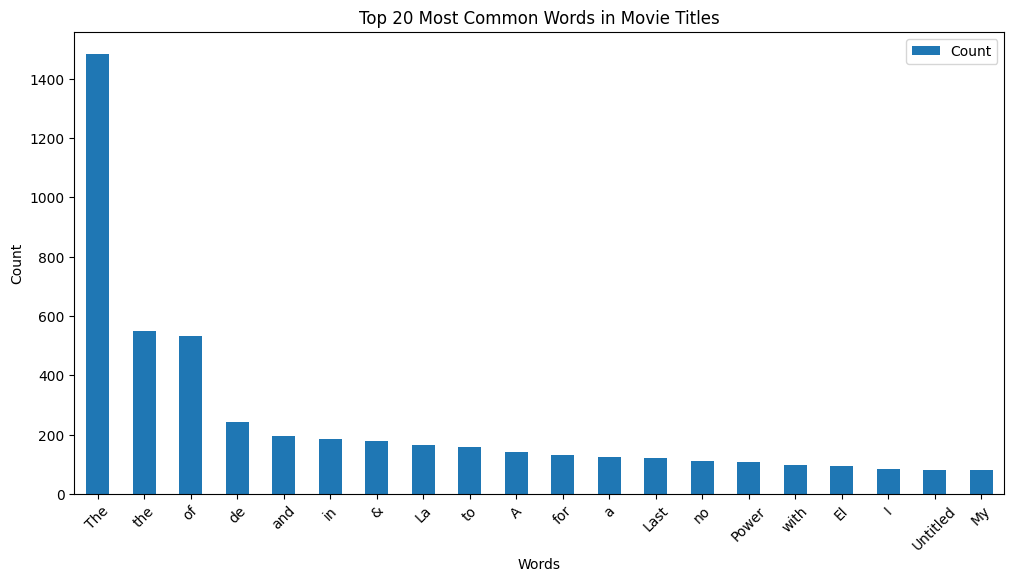

In [506]:
# Tokenize movie titles (split into individual words)
movie_titles = movies['MOVIES'].str.split()

# Flatten the list of tokens
tokens = [word for sublist in movie_titles for word in sublist]

# Count the frequency of each word
word_counts = Counter(tokens)

# Convert the word counts to a DataFrame for easier manipulation
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Sort the words by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Plot the top N words (e.g., top 20)
top_N = 20
word_counts_df.head(top_N).plot(kind='bar', figsize=(12, 6))
plt.title(f"Top {top_N} Most Common Words in Movie Titles")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


I want to see other symbols that are in the column that are not to be there:

In [507]:
# Define a regular expression pattern to match symbols you want to exclude
# For example, to exclude '#' and any non-alphanumeric characters, you can use:
exclude_pattern = r'([^a-zA-Z0-9\s]+)'

# Apply the regular expression pattern to the 'MOVIES' column
matches = movies['MOVIES'].str.extractall(exclude_pattern)

# Get unique symbols from the matches
symbols_to_exclude = matches[0].unique()

# Print the list of symbols to exclude
print("Symbols that shouldn't be in movie titles:")
for symbol in symbols_to_exclude:
    print(symbol)

Symbols that shouldn't be in movie titles:
:
/
'
-
(
)
É
î
ô
.
,
&
.'
û
é
!
***
è
!!
¿
ó
?
â
;
Ó
æ
ð
ç
#
~
%
ô-
...
**
----
ê
í
ñ
È
ö
à
!!!
á
ô:
ë
.:
²
ø
_
ù
Â
Ô
+
ú
ä
ü
ü?
ï
å
>
[
]
ã
Ò
ò
û:
Á
Ö
·
Ç
?!
üçü
Ü
çõ
ª
ñí
¡
çã
*
"
@
=
..
******
À
!:
ú:
é,
é!:
..?
Í
²:
Å
..!


we can see they are so many and its obvious they shouldnt be there:

In [508]:
symbols_to_exclude

array([':', '/', "'", '-', '(', ')', 'É', 'î', 'ô', '.', ',', '&', ".'",
       'û', 'é', '!', '***', 'è', '!!', '¿', 'ó', '?', 'â', ';', 'Ó', 'æ',
       'ð', 'ç', '#', '~', '%', 'ô-', '...', '**', '----', 'ê', 'í', 'ñ',
       'È', 'ö', 'à', '!!!', 'á', 'ô:', 'ë', '.:', '²', 'ø', '_', 'ù',
       'Â', 'Ô', '+', 'ú', 'ä', 'ü', 'ü?', 'ï', 'å', '>', '[', ']', 'ã',
       'Ò', 'ò', 'û:', 'Á', 'Ö', '·', 'Ç', '?!', 'üçü', 'Ü', 'çõ', 'ª',
       'ñí', '¡', 'çã', '*', '"', '@', '=', '..', '******', 'À', '!:',
       'ú:', 'é,', 'é!:', '..?', 'Í', '²:', 'Å', '..!'], dtype=object)

In [509]:
# Define the list of symbols to remove
symbols_to_remove = symbols_to_exclude.tolist()

# Escape special characters in the symbols
symbols_to_remove_escaped = [re.escape(symbol) for symbol in symbols_to_remove]

# Remove symbols from the 'MOVIES' column
for symbol in symbols_to_remove_escaped:
    movies['MOVIES'] = movies['MOVIES'].str.replace(symbol, '')

## `YEAR`

In [510]:
movies.YEAR.value_counts

<bound method IndexOpsMixin.value_counts of 0            (2021)
1          (2021– )
2       (2010–2022)
3          (2013– )
4            (2021)
           ...     
9993       (2022– )
9995       (2021– )
9996       (2022– )
9997       (2021– )
9998       (2021– )
Name: YEAR, Length: 9568, dtype: object>

In [511]:

# Extract valid years and convert them to a consistent format
movies['YEAR'] = movies['YEAR'].str.extract(r'(\d{4})', expand=False)

# Convert the 'YEAR' column to numeric, treating invalid values as NaN
movies['YEAR'] = pd.to_numeric(movies['YEAR'], errors='coerce')

# Change the 'YEAR' column data type to object (string)
movies['YEAR'] = movies['YEAR'].astype(str)



In [512]:
movies.YEAR.dtype

dtype('O')

## `GENRE`

In [513]:
movies.GENRE

0            Action, Horror, Thriller            
1        Animation, Action, Adventure            
2             Drama, Horror, Thriller            
3        Animation, Adventure, Comedy            
4               Action, Crime, Horror            
                          ...                    
9993                  Drama, Thriller            
9995     Animation, Action, Adventure            
9996               Documentary, Sport            
9997        Adventure, Drama, Fantasy            
9998        Adventure, Drama, Fantasy            
Name: GENRE, Length: 9568, dtype: object

In [514]:
# Clean and normalize the 'GENRE' column
movies['GENRE'] = movies['GENRE'].str.strip()  # Remove leading/trailing spaces
movies['GENRE'] = movies['GENRE'].str.lower()  # Convert to lowercase

# Split the comma-separated genres and create a list of all genres
genre_lists = movies['GENRE'].str.split(', ')

# Flatten the list of genres
all_genres = [genre for sublist in genre_lists.dropna() for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Print the top 10 most common genres
print("Top 10 Most Common Genres (Cleaned and Normalized):")
print(genre_counts.head(10))

Top 10 Most Common Genres (Cleaned and Normalized):
drama          4115
comedy         2736
action         2110
adventure      1588
animation      1584
crime          1519
documentary    1221
thriller        895
mystery         840
romance         835
dtype: int64


In [515]:
movies.GENRE

0           action, horror, thriller
1       animation, action, adventure
2            drama, horror, thriller
3       animation, adventure, comedy
4              action, crime, horror
                    ...             
9993                 drama, thriller
9995    animation, action, adventure
9996              documentary, sport
9997       adventure, drama, fantasy
9998       adventure, drama, fantasy
Name: GENRE, Length: 9568, dtype: object

Are there nulls in this column?

In [516]:
# Check for null values in the 'GENRE' column
null_count = movies['GENRE'].isnull().sum()

# Print the number of null values
print(f"Number of null values in the 'GENRE' column: {null_count}")

Number of null values in the 'GENRE' column: 78


In [517]:
# Remove rows with null values in the 'GENRE' column
movies = movies.dropna(subset=['GENRE'])

## `RATING`

Let me see if there are rows with values more than 10

In [518]:

# Filter rows with 'RATING' values greater than 10
rows_with_ratings_above_10 = movies[movies['RATING'] > 10]

# Check if there are any such rows
if not rows_with_ratings_above_10.empty:
    print("Rows with 'RATING' values greater than 10:")
    print(rows_with_ratings_above_10)
else:
    print("No rows with 'RATING' values greater than 10 found.")


No rows with 'RATING' values greater than 10 found.


Ok, thats cool, I will fill the `NaN` with 0

In [519]:
# # Calculate the mean rating (rounded to one decimal point)
# mean_rating = round(movies['RATING'].mean(), 1)

# Fill NaN values in the 'RATING' column with the mean
movies['RATING'].fillna(0, inplace=True)

In [520]:
movies.RATING

0       6.1
1       5.0
2       8.2
3       9.2
4       0.0
       ... 
9993    0.0
9995    0.0
9996    0.0
9997    0.0
9998    0.0
Name: RATING, Length: 9490, dtype: float64

## `ONE-LINE`

First I will change this to `DESCRIPTION`

In [521]:
# Rename the 'ONE-LINE' column to 'SUMMARY'
movies.rename(columns={'ONE-LINE': 'DESCRIPTION'}, inplace=True)

In [522]:
movies.DESCRIPTION

0                                                                                     A woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.
1                                                                      The war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.
2                                                                                           Sheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.
3                                                                                                                          An animated series that follows the exploits of a super scientist and his not-so-bright grandson.
4        A prequel, set before the events of Army of the Dead, which focuses on German safecracker Ludwig Dieter lea

We can see there are lots of rows with 'Add a Plot' I will change that too to 'No Description Avalaible'

In [523]:

# Replace "Add a Plot" with "No Description Available" in the 'SUMMARY' column
movies['DESCRIPTION'] = movies['DESCRIPTION'].str.replace('Add a Plot', 'No Description Available')

## `STARS`

In [524]:

# Set the Pandas option to display more text in columns
pd.set_option('display.max_colwidth', None)


# Display the 'STARS' column with full text
print(movies['STARS'].sample(50))


1700                                                 Director: Trivikram Srinivas |      Stars: Allu Arjun,  Pooja Hegde,  Tabu,  Jayaram 
2541                                Director: Marcus Dunstan |      Stars: Josh Stewart,  Bill Engvall,  Alex Essoe,  Ronnie Gene Blevins 
8310                                   Director: Mathieu Demy |      Stars: Elisabeth Shue,  Giovanni Ribisi,  Julie Delpy,  Rob Benedict 
3487                                                        Stars: Loren Coleman,  Dallas Santana,  Jessica Lynch Alfaro,  Craig Stanford 
948                                                         Stars: Katharine McPhee,  Eddie Cibrian,  Ricardo Hurtado,  Jamie Martin Mann 
7809                                                               Director: Adam Franklin |      Stars: Justin Willman,  Mercedes Garcia 
5116                                                                                                                                      
3911                       

So, we can see that there are Stars and Director, I will remove Director since the column is named stars:

In [525]:
# Extract stars' names from the 'STARS' column (ignoring directors)
movies['STARS'] = movies['STARS'].str.replace('Director:', '')  # Remove "Director:" if present
movies['STARS'] = movies['STARS'].str.strip()  # Remove leading/trailing whitespace
movies['STARS'] = movies['STARS'].str.split('|').str[1].str.strip()  # Extract stars' names

In [526]:
# Remove "Stars: " prefix from all rows in the 'STARS' column
movies['STARS'] = movies['STARS'].str.replace('Stars: ', '', case=False)

In [527]:
# Fill NaN values in the 'STARS' column with 'Stars Names not Available'
movies['STARS'].fillna('Stars Names not Available', inplace=True)

In [528]:

# Set the Pandas option to display more text in columns
pd.set_option('display.max_colwidth', None)


# Display the 'STARS' column with full text
print(movies['STARS'].sample(50))


1012                       Richard Pryor,  Gene Wilder,  Joan Severance,  Kevin Spacey
3191                                                         Stars Names not Available
4542                                                         Stars Names not Available
9449                                                         Stars Names not Available
3466                                                         Stars Names not Available
4914       Ted Olson,  Christopher D. Dusseault,  Jeffrey J. Zarrillo,  Paul T. Katami
3105                                                         Stars Names not Available
4375               Cam Gigandet,  Teri Reeves,  Benjamin Charles Watson,  Sherri Eakin
4764                                                                   Star: Ron White
2960              Kartik Aaryan,  Omkar Kapoor,  Sunny Singh Nijjar,  Nushrat Bharucha
3285                          Selma Blair,  Joshua Close,  James D'Arcy,  Rachel Miner
5318                              Joe Cocke

## `VOTES`

In [529]:
movies.VOTES

0        21,062
1        17,870
2       885,805
3       414,849
4           NaN
         ...   
9993        NaN
9995        NaN
9996        NaN
9997        NaN
9998        NaN
Name: VOTES, Length: 9490, dtype: object

I will need to remove all the commas and others so that this column can be intega

In [530]:
# Step 1: Remove non-numeric characters (commas, etc.) and replace NaN with 0
movies['VOTES'] = movies['VOTES'].str.replace('[^\d]', '', regex=True).fillna('0')

# Step 2: Convert the column to numeric (integer) data type
movies['VOTES'] = pd.to_numeric(movies['VOTES'], downcast='integer')


In [531]:
movies.VOTES

0        21062
1        17870
2       885805
3       414849
4            0
         ...  
9993         0
9995         0
9996         0
9997         0
9998         0
Name: VOTES, Length: 9490, dtype: int32

## `RunTime`


In [532]:
movies.RunTime

0       121.0
1        25.0
2        44.0
3        23.0
4         NaN
        ...  
9993      NaN
9995      NaN
9996      NaN
9997      NaN
9998      NaN
Name: RunTime, Length: 9490, dtype: float64

I will:
1. Rename the 'RunTime' column to 'RUNTIME.'
2. Replace any NaN values with 0 (assuming that missing values represent a runtime of 0).
3. Convert the column to integer data type (assuming that runtime values are in whole minutes).



In [533]:
# Step 1: Rename the column
movies.rename(columns={'RunTime': 'RUNTIME'}, inplace=True)

# Step 2: Replace NaN values with 0
movies['RUNTIME'].fillna(0, inplace=True)

# Step 3: Convert the column to integer data type
movies['RUNTIME'] = movies['RUNTIME'].astype(int)

## `Gross`

In [534]:
movies.Gross.sample(10)

8553    NaN
6328    NaN
4313    NaN
514     NaN
3361    NaN
7924    NaN
9143    NaN
7168    NaN
4943    NaN
3995    NaN
Name: Gross, dtype: object

I will:

1. Rename the column to 'GROSS.'
2. Remove the dollar sign ('$') and 'M' from the values.
3. Replace any NaN values with 0.
4. Convert the column to a numeric data type (assuming the values represent millions of dollars).




In [535]:
# Step 1: Rename the column
movies.rename(columns={'Gross': 'GROSS'}, inplace=True)

# Step 2: Remove the dollar sign and 'M' from values
# Remove the dollar sign and 'M' from values without using regex=True
movies['GROSS'] = movies['GROSS'].str.replace(['$', 'M'], '', regex=False)

# Step 3: Replace NaN values with 0
movies['GROSS'].fillna(0, inplace=True)

# Step 4: Convert the column to a numeric data type
movies['GROSS'] = pd.to_numeric(movies['GROSS'], errors='coerce')

In [536]:
movies.sample(8)

,MOVIES,YEAR,GENRE,RATING,DESCRIPTION,STARS,VOTES,RUNTIME,GROSS
7696,Unnatural Selection,2019.0,documentary,7.2,"Using gene drive technology, humans have the chance to shape and eradicate whole species. But the implications alarm bioethicists and activists.","David Ishee, Tristan Roberts, Aaron Traywick, Mac Davis",78,62,0.0
4457,Lego Friends,2013.0,animation,5.2,Five Best Friends Go on Many Fun Lego adventures.,Stars Names not Available,129,4,0.0
3325,Splatter,2009.0,horror,3.2,"After self-righteous rock star Jonny Splatter puts a bullet in his own head, only five people are chosen to attend the reading of Splatter's will: the manager, the shrink, the guitarist, ... See full summary »",Stars Names not Available,518,29,0.0
1871,Blue Mountain State The Rise of Thadland,2016.0,"comedy, sport",5.7,"When the Dean of Blue Mountain State threatens to sell the Goat House, Alex throws Thad the party of his dreams in an effort to get him to buy it.","Alan Ritchson, Darin Brooks, James Cade, Rob Ramsay",15091,90,0.0
6977,Oktoberfest Beer Blood,2020.0,"drama, history, thriller",6.9,The murder of Ignatz Hoflinger shocks Munich but gives Prank an opportunity to seize the victim's festival lot. Roman and Clara awkwardly meet again.,"Misel Maticevic, Martina Gedeck, Klaus Steinbacher, Mercedes Müller",104,48,0.0
2679,Divines,2016.0,"crime, drama",7.4,A street teenager from a dysfunctional family from a banlieue (HLMs) in Paris comes across a young dancer who turns her life upside down.,"Oulaya Amamra, Déborah Lukumuena, Kévin Mischel, Jisca Kalvanda",9245,105,0.0
4163,Evelyn,2018.0,documentary,7.1,"Following his Oscar winning The White Helmets, Orlando von Einsiedel turns his camera on his own family as they attempt to cope with a devastating loss. When his brother, newly diagnosed as... See full summary »",Star: Orlando von Einsiedel,687,100,0.0
6915,Cobra Kai,2018.0,"action, comedy, drama",9.5,"Old wounds begin to heal at a country club Christmas party, but a brutal assault by Kreese's students leads to new betrayals and alliances.","Ralph Macchio, William Zabka, Courtney Henggeler, Xolo Maridueña",4554,41,0.0


In [537]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MOVIES       9490 non-null   object 
 1   YEAR         9490 non-null   object 
 2   GENRE        9490 non-null   object 
 3   RATING       9490 non-null   float64
 4   DESCRIPTION  9490 non-null   object 
 5   STARS        9490 non-null   object 
 6   VOTES        9490 non-null   int32  
 7   RUNTIME      9490 non-null   int64  
 8   GROSS        9490 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 704.3+ KB


I will save the cleaned dataset:

In [538]:
# Save the cleaned dataset to a CSV file
movies.to_csv('cleaned_movies_dataset.csv', index=False)